In [309]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import scipy

# Load Data

In [310]:
df = pd.read_csv("FIFA-21 Complete.csv", delimiter = ';')

In [311]:
df['team'] = df['team'].apply(lambda x:x.replace('FC ', '').strip())
df

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid
...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club


In [312]:
# English Premier League (EPL)
epl_teams = [
    "Manchester City", "Manchester United", "Liverpool", "Chelsea", "Arsenal",
    "Tottenham Hotspur", "Leicester City", "West Ham United", "Wolverhampton Wanderers",
    "Everton", "Aston Villa", "Leeds United", "Crystal Palace", "Southampton",
    "Newcastle United", "Brighton & Hove Albion", "Burnley", "Fulham", "West Bromwich Albion",
    "Sheffield United"
]

# La Liga (Spain)
la_liga_teams = [
    "Real Madrid", "Barcelona", "Atlético Madrid", "Sevilla", "Real Sociedad",
    "Villarreal", "Real Betis", "Athletic Bilbao", "Valencia", "Granada",
    "Levante", "Celta Vigo", "Osasuna", "Getafe", "Cádiz", "Alavés", "Elche", "Eibar", "Huesca",
    "Real Valladolid"
]

# Serie A (Italy)
serie_a_teams = [
    "Inter Milan", "AC Milan", "Juventus", "Atalanta", "Napoli",
    "Lazio", "AS Roma", "Sassuolo", "Sampdoria", "Hellas Verona",
    "Benevento", "Bologna", "Udinese", "Fiorentina", "Cagliari", "Torino", "Spezia", "Genoa",
    "Parma", "Crotone"
]

# Bundesliga (Germany)
bundesliga_teams = [
    "Bayern Munich", "Borussia Dortmund", "RB Leipzig", "Borussia Mönchengladbach", "Bayer Leverkusen",
    "Hoffenheim", "Wolfsburg", "Freiburg", "Eintracht Frankfurt", "Union Berlin",
    "Stuttgart", "Augsburg", "Hertha BSC", "Werder Bremen", "Mainz 05", "Arminia Bielefeld", "1. FC Köln", "Schalke 04"
]

# Ligue 1 (France)
ligue_1_teams = [
    "Paris Saint-Germain", "Lille", "Lyon", "AS Monaco", "Marseille",
    "Rennes", "Lens", "Montpellier", "Nice", "Saint-Étienne",
    "Reims", "Bordeaux", "Strasbourg", "Metz", "Brest", "Nantes", "Lorient", "Angers", "Dijon", "Nîmes"
]

europe_top5 = epl_teams + la_liga_teams + serie_a_teams + bundesliga_teams + ligue_1_teams

In [313]:
def add_league(team):
    if team in epl_teams:
        return 'Premier League'
    if team in la_liga_teams:
        return 'La Liga'
    if team in serie_a_teams:
        return 'Serie A'
    if team in bundesliga_teams:
        return 'Bundesliga'
    if team in ligue_1_teams:
        return 'Ligue 1'
df['league'] = df['team'].apply(add_league)

In [314]:
df

,player_id,name,nationality,position,overall,age,hits,potential,team,league
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,Barcelona,La Liga
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus,Serie A
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain,Ligue 1
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool,Premier League
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid,La Liga
...,...,...,...,...,...,...,...,...,...,...
17976,256093,Jaime Ortíz,Ecuador,ST,56,21,0,64,Sociedad Deportiva Aucas,None
17977,256088,Michael Carcelén,Ecuador,CM,56,23,0,64,Club Deportivo El Nacional,None
17978,256074,Davide Luzi,Venezuela,ST,56,18,1,68,Zamora Fútbol Club,None
17979,256073,Sergio Sulbarán,Venezuela,RW,56,22,0,62,Zamora Fútbol Club,None


In [315]:
asian_countries = ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", "Maldives", "Mongolia", "Myanmar (Burma)", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", "Singapore", "Korea Republic", "Sri Lanka", "Syria", "Taiwan", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"]
african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo (Brazzaville)", "Congo (Kinshasa)", "Cote d'Ivoire", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]
north_american_countries = ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States of America"]
south_american_countries = ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"]
australian_countries = ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
european_countries = ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia & Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "England", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Scotland", "Wales", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"]

In [316]:
def get_continent(country):
    if country in asian_countries:
        return 'Asia'
    if country in african_countries:
        return'Africa'
    if country in north_american_countries:
        return 'North America'
    if country in south_american_countries:
        return 'South America'
    if country in australian_countries:
        return 'Oceania'
    if country in european_countries:
        return 'Europe'

In [317]:
df['continent'] = df['nationality'].apply(get_continent)
df['continent'].dropna(inplace=True)

In [318]:
# df = df[df['overall'] >= 60]


In [319]:
df = df[df['team'].apply(lambda x: x in europe_top5)]

In [320]:
df['position'] = df['position'].apply(lambda x: x.split('|')[0])

/var/folders/l4/_05z95nd17s9bmdj8sjhyxbw0000gn/T/ipykernel_23631/2511772602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['position'] = df['position'].apply(lambda x: x.split('|')[0])


In [321]:
df

,player_id,name,nationality,position,overall,age,hits,potential,team,league,continent
0,158023,Lionel Messi,Argentina,ST,94,33,299,94,Barcelona,La Liga,South America
1,20801,Cristiano Ronaldo,Portugal,ST,93,35,276,93,Juventus,Serie A,Europe
2,190871,Neymar Jr,Brazil,CAM,92,28,186,92,Paris Saint-Germain,Ligue 1,South America
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool,Premier League,Europe
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid,La Liga,Europe
...,...,...,...,...,...,...,...,...,...,...,...
17812,241421,Harlem Hale,England,ST,57,20,2,65,Southampton,Premier League,Europe
17846,238070,Jamie Cumming,England,GK,57,20,1,72,Chelsea,Premier League,Europe
17865,236325,Jake Vokins,England,LB,57,20,3,73,Southampton,Premier League,Europe
17871,235728,Warren O'Hora,Republic of Ireland,CB,57,21,2,72,Brighton & Hove Albion,Premier League,None


In [322]:
df = df[['name', 'league', 'continent', 'position', 'age', 'hits', 'potential', 'overall']]
df

,name,league,continent,position,age,hits,potential,overall
0,Lionel Messi,La Liga,South America,ST,33,299,94,94
1,Cristiano Ronaldo,Serie A,Europe,ST,35,276,93,93
2,Neymar Jr,Ligue 1,South America,CAM,28,186,92,92
3,Virgil van Dijk,Premier League,Europe,CB,29,127,92,91
4,Jan Oblak,La Liga,Europe,GK,27,47,93,91
...,...,...,...,...,...,...,...,...
17812,Harlem Hale,Premier League,Europe,ST,20,2,65,57
17846,Jamie Cumming,Premier League,Europe,GK,20,1,72,57
17865,Jake Vokins,Premier League,Europe,LB,20,3,73,57
17871,Warren O'Hora,Premier League,None,CB,21,2,72,57


In [323]:
df = df.dropna()

In [324]:
football = df.copy()
football['rating'] = (football['potential'] + football['overall'])/2

In [325]:
football = football[['name', 'league', 'continent', 'position', 'age', 'hits', 'rating']]
football

,name,league,continent,position,age,hits,rating
0,Lionel Messi,La Liga,South America,ST,33,299,94.0
1,Cristiano Ronaldo,Serie A,Europe,ST,35,276,93.0
2,Neymar Jr,Ligue 1,South America,CAM,28,186,92.0
3,Virgil van Dijk,Premier League,Europe,CB,29,127,91.5
4,Jan Oblak,La Liga,Europe,GK,27,47,92.0
...,...,...,...,...,...,...,...
17799,Andreas Søndergaard,Premier League,Europe,GK,19,1,66.0
17812,Harlem Hale,Premier League,Europe,ST,20,2,61.0
17846,Jamie Cumming,Premier League,Europe,GK,20,1,64.5
17865,Jake Vokins,Premier League,Europe,LB,20,3,65.0


# Model Assumption

## Multicollinearity Check

### Pairwise Correlation 

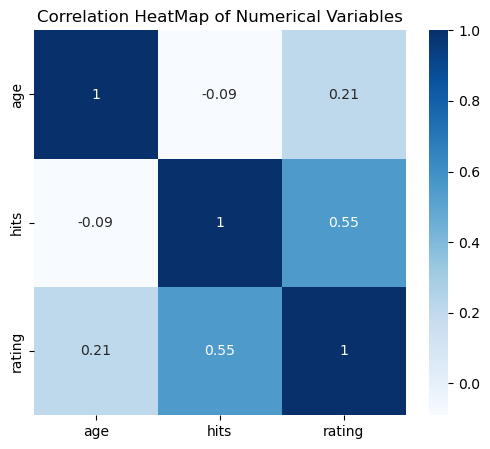

In [326]:
correlation_matrix = football.corr(numeric_only=True).round(2)
plt.figure(figsize=(6, 5))
# correlation_matrix = correlation_matrix.iloc[1:, 1:]
ax = sns.heatmap(data=correlation_matrix, annot=True, cmap="Blues")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_bottom()
ax.set_title('Correlation HeatMap of Numerical Variables')
plt.show()

<div class="alert alert-block alert-info">
<b>Findings:</b> The heatmap above gives us the information of pairwise correlation for numerical variables. For example, age~potential and hits~potential might be somehow correlated. But the correlation coefficients would not detect the problem of one predictor related to multiple predictors or provide a threshold for how serious multicollinearity is. We need to move on to VIF analysis to further check multicollinearity.
</div>

### VIF

In [327]:
y, X = dmatrices('rating~continent+league+position+age+hits', data=football, return_type='dataframe')
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

    VIF Factor                    features
0    94.190735                   Intercept
1     1.244045           continent[T.Asia]
2     3.072727         continent[T.Europe]
3     1.134940  continent[T.North America]
4     1.084817        continent[T.Oceania]
5     2.769098  continent[T.South America]
6     1.764078           league[T.La Liga]
7     1.359034           league[T.Ligue 1]
8     2.338191    league[T.Premier League]
9     2.269651           league[T.Serie A]
10    6.560546              position[T.CB]
11    5.206537             position[T.CDM]
12    1.255103              position[T.CF]
13    4.071752              position[T.CM]
14    5.133552              position[T.GK]
15    4.443693              position[T.LB]
16    2.519882              position[T.LM]
17    1.151223              position[T.LW]
18    1.116990             position[T.LWB]
19    4.424002              position[T.RB]
20    3.588271              position[T.RM]
21    1.578400              position[T.RW]
22    1.765

<div class="alert alert-block alert-info">
<b>Intercept:</b> We don't need to care about intercept, because intercept(all 1s) may be correlated to some variables(high percentage of 1s) naturally.

<b>age, hits, and potential:</b> Since all variables display VIF factor less than 10, so multicollinearity between these variables can be ignored.
</div>

## Influential Points

In [328]:
# fit initial model
model =smf.ols('rating~continent+league+position+age+hits', data=football).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     41.69
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          7.88e-150
Time:                        13:31:22   Log-Likelihood:                -4257.9
No. Observations:                1438   AIC:                             8568.
Df Residuals:                    1412   BIC:                             8705.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     65.4611      1.207     54.222      0.000      63.093      67.829
continent[T.Asia]             -0.4485      1.215     -0.369      0.712      -2.832       1.935
continent[T.Europe]           -0.5065      0.558     -0.908      0.364      -1.600       0.587
continent[T.North America]     0.1169      1.595      0.073      0.942      -3.011       3.245
continent[T.Oceania]          -0.8350      2.010     -0.415      0.678      -4.778       3.108
continent[T.South America]     1.3044      0.662      1.971      0.049       0.006       2.603
league[T.La Liga]              1.1817      0.486      2.433      0.015       0.229       2.135
league[T.Ligue 1]             -1.8321      0.615     -2.979      0.003      -3.038      -0.626
league[T.Premier League]      -0.8109      0.390     -2.080      0.038      -1.576      -0.046
league[T.Serie A]             -1.6027      0.419     -3.823      0.000      -2.425      -0.780
position[T.CB]                 0.7970      0.859      0.928      0.354      -0.888       2.482
position[T.CDM]                1.4408      0.881      1.635      0.102      -0.288       3.170
position[T.CF]                 1.9596      1.767      1.109      0.268      -1.507       5.426
position[T.CM]                 1.9339      0.911      2.123      0.034       0.147       3.721
position[T.GK]                -1.3405      0.891     -1.504      0.133      -3.089       0.408
position[T.LB]                -0.0968      0.899     -0.108      0.914      -1.860       1.667
position[T.LM]                 0.9820      1.021      0.962      0.336      -1.020       2.984
position[T.LW]                 0.5917      2.267      0.261      0.794      -3.856       5.040
position[T.LWB]                4.0471      2.496      1.621      0.105      -0.850       8.944
position[T.RB]                -0.2256      0.900     -0.251      0.802      -1.991       1.540
position[T.RM]                 0.9484      0.935      1.014      0.311      -0.886       2.783
position[T.RW]                -0.2144      1.334     -0.161      0.872      -2.832       2.403
position[T.RWB]               -1.1271      1.218     -0.926      0.355      -3.516       1.261
position[T.ST]                 0.2937      0.860      0.341      0.733      -1.394       1.982
age                            0.3652      0.028     13.225      0.000       0.311       0.419
hits                           0.1169      0.005     25.771      0.000       0.108       0.126
==============================================================================
Omnibus:                      163.775   Durbin-Watson:                   0.650
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.836
Skew:                          -0.723   Prob(JB):                     1.93e-68
Kurtosis:   

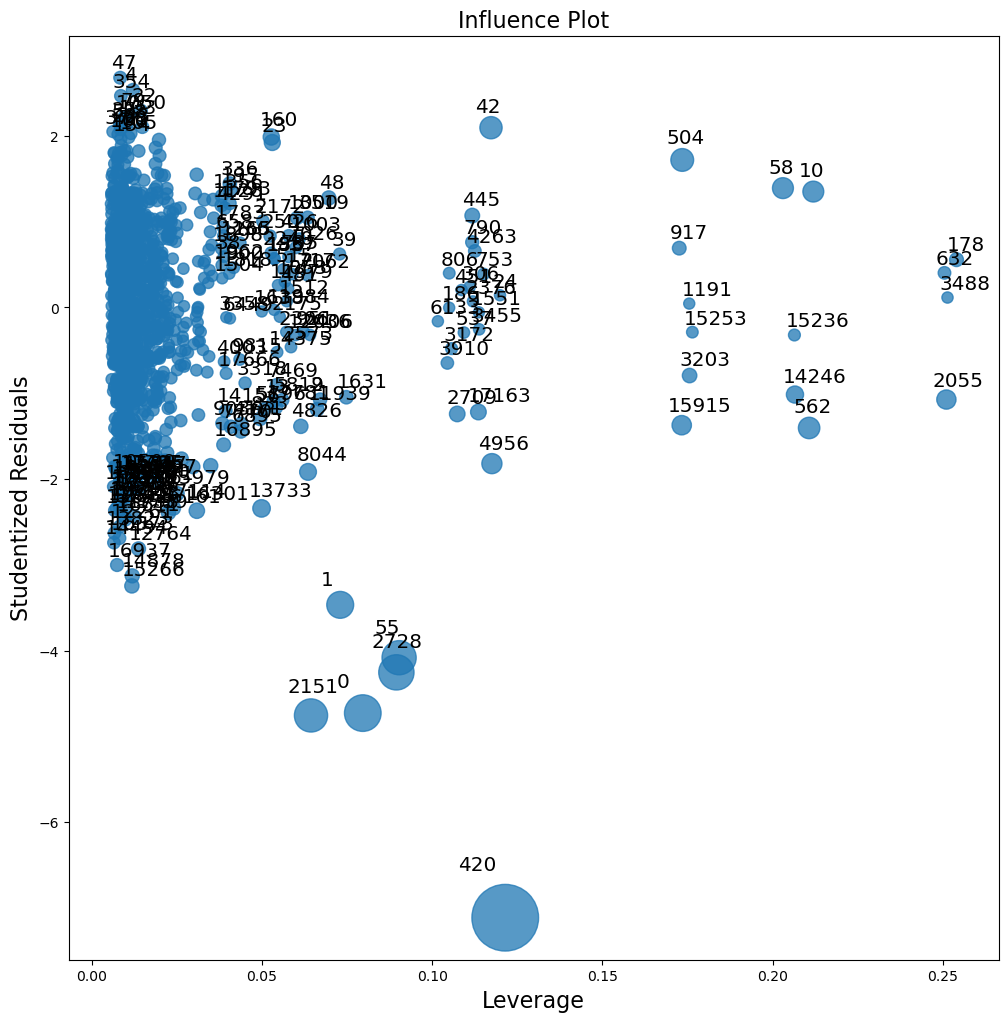

In [329]:
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 

In [336]:
model.nobs

1438.0

### External Studentized Residuals

In [337]:
#threshold externally studentized residuals
infl = model.get_influence()
n=int(model.nobs)
p=int(model.df_model)
seuil_stud = scipy.stats.t.ppf(0.975,df=n-p-1)
#detection - absolute value > threshold
reg_studs=infl.resid_studentized_external
atyp_stud = np.abs(reg_studs) > seuil_stud
#which ones?
print(football.index[atyp_stud],reg_studs[atyp_stud])

Int64Index([    0,     1,     4,     8,    22,    27,    28,    37,    42,
               47,    53,    55,    79,   100,   103,   105,   154,   160,
              283,   354,   420,  1050,  2151,  2728,  4967,  5905,  5950,
             9230, 10340, 10509, 10512, 11300, 11738, 11739, 12261, 12764,
            12792, 12855, 13733, 13823, 13892, 14494, 14560, 14790, 14878,
            15266, 15671, 15747, 15979, 16011, 16161, 16297, 16301, 16373,
            16511, 16900, 16937, 17113, 17114, 17372, 17426, 17506, 17675,
            17795, 17812],
           dtype='int64') [-4.72700728 -3.46582042  2.53243103  2.10236725  2.29161963  2.1415026
  2.02876781  2.04858396  2.09407198  2.67641086  2.11517563 -4.08160843
  2.23698931  2.0163682   2.16083751  1.9828077   1.96806721  1.9856288
  2.07272918  2.46506533 -7.1113307   2.22261852 -4.75437157 -4.25232882
 -2.03088647 -2.07431308 -2.10009444 -2.03204407 -2.29695091 -1.96544905
 -2.04398967 -2.08530508 -2.43683332 -2.43579523 -2.5559631

### Cook's Distance

In [338]:
inflsum=infl.summary_frame()
reg_cook=inflsum.cooks_d

atyp_cook = np.abs(reg_cook) >= 4/n
print(football.index[atyp_cook],reg_cook[atyp_cook])

Int64Index([    0,     1,     2,     4,    10,    22,    23,    42,    48,
               55,    58,   160,   178,   195,   241,   336,   420,   445,
              504,   562,   574,   790,   833,   917,  1631,  1948,  2055,
             2151,  2709,  2728,  3203,  3519,  4171,  4826,  4956,  4967,
             5796,  6895,  7770,  8044,  9036, 11739, 11939, 12764, 13183,
            13733, 14246, 14878, 15266, 15310, 15452, 15643, 15915, 15979,
            16161, 16301, 16895, 17114, 17163, 17781],
           dtype='int64') 0        0.073228
1        0.036088
2        0.003191
4        0.003011
10       0.018831
22       0.002944
23       0.007937
42       0.022350
48       0.004681
55       0.062883
58       0.018914
160      0.008425
178      0.004054
195      0.003030
241      0.002923
336      0.003385
420      0.259734
445      0.005540
504      0.023789
562      0.020242
574      0.002948
790      0.002793
833      0.003374
917      0.003824
1631     0.003405
1948     0.002812
2

In [339]:
intersection = set(list(football.index[atyp_cook]) + list(football.index[atyp_stud]))
len(intersection)

105

In [340]:
football = football[~football.index.isin(intersection)]

In [341]:
# fit model without influential points
model =smf.ols('rating~continent+league+position+age+hits', data=football).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     68.62
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          3.36e-217
Time:                        13:33:45   Log-Likelihood:                -3640.4
No. Observations:                1333   AIC:                             7333.
Df Residuals:                    1307   BIC:                             7468.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     64.5685      1.011     63.848      0.000      62.585      66.552
continent[T.Asia]             -0.1148      1.074     -0.107      0.915      -2.221       1.991
continent[T.Europe]           -0.4298      0.458     -0.938      0.348      -1.328       0.469
continent[T.North America]    -1.2728      1.408     -0.904      0.366      -4.035       1.489
continent[T.Oceania]          -1.0728      2.703     -0.397      0.692      -6.376       4.230
continent[T.South America]     0.9523      0.544      1.750      0.080      -0.115       2.020
league[T.La Liga]              0.9659      0.403      2.396      0.017       0.175       1.757
league[T.Ligue 1]             -2.1110      0.514     -4.111      0.000      -3.118      -1.104
league[T.Premier League]      -1.1776      0.323     -3.644      0.000      -1.812      -0.544
league[T.Serie A]             -1.4698      0.345     -4.263      0.000      -2.146      -0.793
position[T.CB]                 0.5065      0.745      0.680      0.497      -0.955       1.968
position[T.CDM]                1.3941      0.762      1.829      0.068      -0.101       2.889
position[T.CF]                 1.6818      1.820      0.924      0.356      -1.888       5.251
position[T.CM]                 1.3449      0.784      1.716      0.086      -0.192       2.882
position[T.GK]                -1.9870      0.781     -2.543      0.011      -3.520      -0.454
position[T.LB]                -0.5117      0.772     -0.662      0.508      -2.027       1.004
position[T.LM]                 1.3779      0.876      1.573      0.116      -0.340       3.096
position[T.LW]                -0.9597      3.821     -0.251      0.802      -8.456       6.536
position[T.LWB]                4.9438      2.747      1.800      0.072      -0.446      10.333
position[T.RB]                -0.4554      0.776     -0.587      0.558      -1.978       1.067
position[T.RM]                 0.9814      0.803      1.222      0.222      -0.595       2.557
position[T.RW]                -1.1672      1.231     -0.948      0.343      -3.583       1.248
position[T.RWB]                0.4368      1.114      0.392      0.695      -1.748       2.621
position[T.ST]                 0.1699      0.747      0.227      0.820      -1.296       1.635
age                            0.4013      0.023     17.428      0.000       0.356       0.447
hits                           0.1664      0.005     33.031      0.000       0.157       0.176
==============================================================================
Omnibus:                       33.224   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.610
Skew:                          -0.380   Prob(JB):                     3.05e-08
Kurtosis:   

## Heteroscedasticity

Text(0.5, 1.0, 'Fitted Values vs. Residuals')

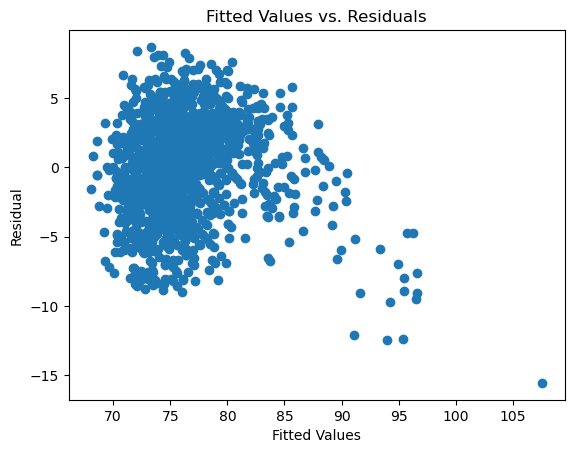

In [342]:
#Heteroscedasticity
#Fitted Values vs. Residuals Plot
p = model.fittedvalues
res = model.resid
plt.scatter(p,res)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals")

In [349]:
over_90 = list(football.index[model.fittedvalues > 95])

In [350]:
for i in over_90:
    print(football[football.index == i])

              name          league continent position  age  hits  rating
3  Virgil van Dijk  Premier League    Europe       CB   29   127    91.5
              name          league continent position  age  hits  rating
5  Kevin De Bruyne  Premier League    Europe       CM   29   119    91.0
             name   league continent position  age  hits  rating
13  Kylian Mbappé  Ligue 1    Europe       ST   21   222    92.0
             name   league continent position  age  hits  rating
43  Ciro Immobile  Serie A    Europe       ST   30   130    87.0
               name   league continent position  age  hits  rating
57  Frenkie de Jong  La Liga    Europe       CM   23   126    89.0
               name          league continent position  age  hits  rating
61  Bruno Fernandes  Premier League    Europe       CM   25   127    87.5
           name      league continent position  age  hits  rating
62  Timo Werner  Bundesliga    Europe       ST   24   136    87.5
           name   league continent

<div class="alert alert-block alert-info">
<b>Treatment for outliers:</b> As we can see, the two outliers with fitted values over 90 are not due to system error. They are players with high performance. The reason works for other points which stands for players with high performance in top5 European leagues. Thus, we shouldn't try to remove them from our football dataset.
</div>

In [351]:
#Breusch-Pagan for Heteroskedasticity
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value']
print(dict(zip(labels, bp_test)))
# Heteroskedasticity exists

{'LM Statistic': 153.206925979349, 'LM-Test p-value': 2.1561517112137987e-20}


<div class="alert alert-block alert-info">
<b>BP test:</b> Very small p-value indicates violation of constant variance

</div>

In [352]:
football['log_rating']=np.log(football['rating']+1)

/var/folders/l4/_05z95nd17s9bmdj8sjhyxbw0000gn/T/ipykernel_23631/600879561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football['log_rating']=np.log(football['rating']+1)


Text(0.5, 1.0, 'Fitted Values vs. Residuals after log transformation on y')

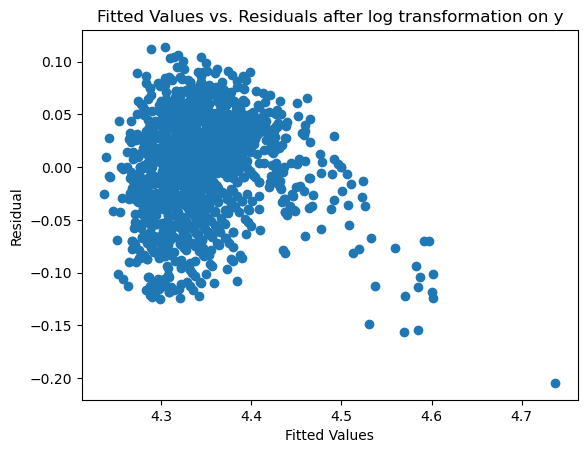

In [353]:
# fit model with log transformation on Y
model =smf.ols('log_rating~continent+league+position+age+hits', data=football).fit()
p1 = model.fittedvalues
res1 = model.resid
plt.scatter(p1,res1)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Fitted Values vs. Residuals after log transformation on y")

<div class="alert alert-block alert-info">
<b>Log Transformation:</b> It's not necessary to conduct log transforamtion on Y here in our football dataset, because we've figured the reason of heteroscedasticity that is caused by high-performance players as the outliers. Meanwhile, the constant variance violation is not serious for the majority of players, and therefore, we keep moving on to robust standard errors with the current dataset.
</div>

## Normality

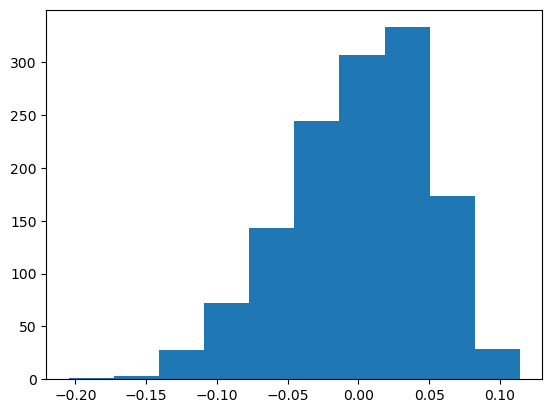

In [357]:
#histogram of residual to observe the shape/skewness
plt.hist(model.resid)
plt.show()

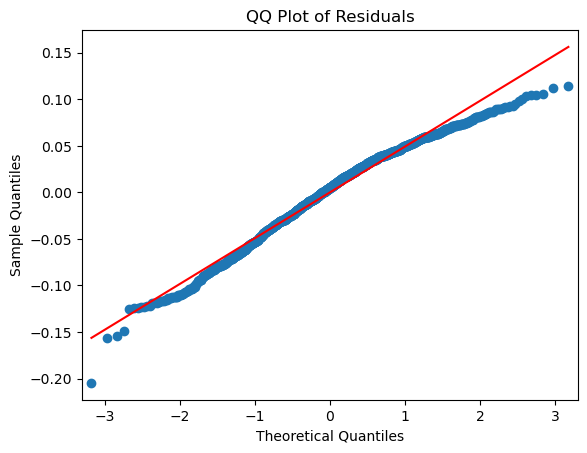

In [358]:
# Create a QQ plot
sm.qqplot(model.resid, line='s')
plt.title("QQ Plot of Residuals")
plt.show()

In [359]:
from scipy.stats import kstest
kstest(model.resid,'norm')

KstestResult(statistic=0.45631894997127165, pvalue=3.1756922514786986e-254, statistic_location=0.10592904374297252, statistic_sign=1)

In [360]:
# JB test
stats.jarque_bera(model.resid)

SignificanceResult(statistic=48.57904049105461, pvalue=2.8261511756707733e-11)

<div class="alert alert-block alert-info">
<b>Normality:</b> Since our original model has violated normality assumption as the result of JB test has told, we can switch to the model of robust standard error we conducted previously and interpret the t-test results.
</div>

## Linearity

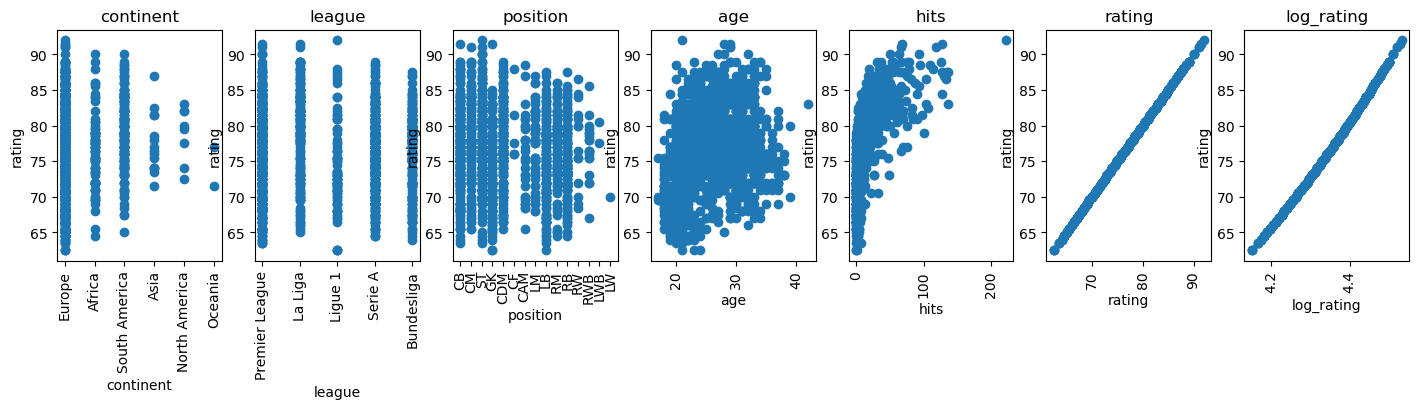

In [361]:
# Nonlinearity beween y and x
#pair-wise scatter plot between y and predictors
plt.figure(figsize=(20, 3))
columns_tocheck = ['continent', 'league', 'position', 'age', 'hits', 'rating', 'log_rating']

# i: index
for i, col in enumerate(columns_tocheck):
    plt.subplot(1, 8, i+1)
    x = football[col]
    y = football['rating']
    plt.plot(x, y, 'o')
    plt.xticks(rotation=90)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('rating')


<div class="alert alert-block alert-info">
<b>Linearity:</b> The linearity looks okay for numerical predictors. It's not necessary to transform X any further.
</div>

# t-test and ANOVA

In [364]:
model =smf.ols('rating~continent+league+position+age+hits', data=football).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     68.62
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          3.36e-217
Time:                        13:36:42   Log-Likelihood:                -3640.4
No. Observations:                1333   AIC:                             7333.
Df Residuals:                    1307   BIC:                             7468.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     64.5685      1.011     63.848      0.000      62.585      66.552
continent[T.Asia]             -0.1148      1.074     -0.107      0.915      -2.221       1.991
continent[T.Europe]           -0.4298      0.458     -0.938      0.348      -1.328       0.469
continent[T.North America]    -1.2728      1.408     -0.904      0.366      -4.035       1.489
continent[T.Oceania]          -1.0728      2.703     -0.397      0.692      -6.376       4.230
continent[T.South America]     0.9523      0.544      1.750      0.080      -0.115       2.020
league[T.La Liga]              0.9659      0.403      2.396      0.017       0.175       1.757
league[T.Ligue 1]             -2.1110      0.514     -4.111      0.000      -3.118      -1.104
league[T.Premier League]      -1.1776      0.323     -3.644      0.000      -1.812      -0.544
league[T.Serie A]             -1.4698      0.345     -4.263      0.000      -2.146      -0.793
position[T.CB]                 0.5065      0.745      0.680      0.497      -0.955       1.968
position[T.CDM]                1.3941      0.762      1.829      0.068      -0.101       2.889
position[T.CF]                 1.6818      1.820      0.924      0.356      -1.888       5.251
position[T.CM]                 1.3449      0.784      1.716      0.086      -0.192       2.882
position[T.GK]                -1.9870      0.781     -2.543      0.011      -3.520      -0.454
position[T.LB]                -0.5117      0.772     -0.662      0.508      -2.027       1.004
position[T.LM]                 1.3779      0.876      1.573      0.116      -0.340       3.096
position[T.LW]                -0.9597      3.821     -0.251      0.802      -8.456       6.536
position[T.LWB]                4.9438      2.747      1.800      0.072      -0.446      10.333
position[T.RB]                -0.4554      0.776     -0.587      0.558      -1.978       1.067
position[T.RM]                 0.9814      0.803      1.222      0.222      -0.595       2.557
position[T.RW]                -1.1672      1.231     -0.948      0.343      -3.583       1.248
position[T.RWB]                0.4368      1.114      0.392      0.695      -1.748       2.621
position[T.ST]                 0.1699      0.747      0.227      0.820      -1.296       1.635
age                            0.4013      0.023     17.428      0.000       0.356       0.447
hits                           0.1664      0.005     33.031      0.000       0.157       0.176
==============================================================================
Omnibus:                       33.224   Durbin-Watson:                   0.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.610
Skew:                          -0.380   Prob(JB):                     3.05e-08
Kurtosis:   

<div class="alert alert-block alert-info">
<b>continent:</b> The dummy of continent = South America has a p-value 0.025 < 0.05, suggesting the continent is a significant predictor in the model. However, one thing worth notification is that the other levels of continent are not siginificant at all. Considering South American players like Leo Messi, Neymar Jr, and Luis Suarez, etc have Thus, maybe we can re-build the predictor continent to have two levels: South America or not. 

<b>league:</b> All levels of league have p-value less than 0.05, suggesting the continent is a significant predictor in the model. Meanwhile, we notice that the coefficient of league = La Liga is 0.9147, indicating that on average estimate the rating of a La Liga player is higher than the rating of a Bundesliga(reference level) player about 0.9147, reflecting the high quality of La Liga. Simultaneously, the coefficient of league = Ligue 1 is -2.1932, showing the average estimate of rating of a Ligue 1 player is 2.1932 lower than a Bundesliga(reference level) player about 2.1932, matching the general impression that Ligue 1 is the worst among top 5 European football leagues in terms of and match quality and business potential.

<b>position:</b> We notice that position = CM and postion = CDM are the significant levels with reference level of position = CAM. This phenomenon matches the style of modern football that central midfielders are the playmakers that have most impact on the pace and result of a match. The players with highest estimate market prices are mostly central midfielders(including defensive and attacking). Thus, we can further modify the predictor to have only two levels: CM or Non-CM while keeping position predictor in our model because of its significance in prediction of ratings.

<b>age</b> age is undoubtedly a crucial factor in any sports, and a significant variable in predicting ratings given its p-value of nearly 0

<b>hits</b> hits demonstrates the desire of attacking of a football player, and generally higher hits can lead to more goals. With a nearly 0 p-value, it is certainly a significant predictor in the model.


</div>

In [365]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
continent,5.0,1435.396792,287.079358,20.407786,1.169089e-19
league,4.0,1851.263227,462.815807,32.900471,3.594761e-26
position,14.0,2091.934162,149.423869,10.622186,3.598696e-23
age,1.0,3406.689939,3406.689939,242.173455,3.167009e-50
hits,1.0,15347.601414,15347.601414,1091.024346,1.845479e-174
Residual,1307.0,18385.763004,14.067148,NaN,NaN


In [366]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
continent,248.410991,5.0,3.531789,3.550314e-03
league,1001.370290,4.0,17.796256,3.087695e-14
position,1331.918056,14.0,6.763062,1.712239e-13
age,4272.734104,1.0,303.738467,2.510757e-61
hits,15347.601414,1.0,1091.024346,1.845479e-174
Residual,18385.763004,1307.0,NaN,NaN


<div class="alert alert-block alert-info">
<b>continent:</b> significant predictor given type I and type II F-test results. Suggested by t-test results, this predictor could be further re-built into a 2-level categorical variable: South America or Non-South America

<b>league:</b> significant predictor given type I and type II F-test results. Suggested by t-test results, this predictor could be further re-built into

<b>position:</b> significant predictor given type I and type II F-test results. Suggested by t-test results, this predictor could be further re-built into a 2-level categorical variable: CM or non-CM

<b>age</b> significant predictor given type I and type II F-test results.

<b>hits</b> significant predictor given type I and type II F-test results. 
</div>

# Feature Engineering and Refitting Model

In [367]:
def add_south_america(continent):
    if continent == 'South America':
        return 1
    else:
        return 0

In [368]:
football['South_America'] = football['continent'].apply(add_south_america)

/var/folders/l4/_05z95nd17s9bmdj8sjhyxbw0000gn/T/ipykernel_23631/302349999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football['South_America'] = football['continent'].apply(add_south_america)


In [369]:
def add_CM(position):
    if position == 'CM' or position == 'CAM' or position == 'CDM':
        return 1
    else:
        return 0

In [370]:
football['CM'] = football['position'].apply(add_CM)

/var/folders/l4/_05z95nd17s9bmdj8sjhyxbw0000gn/T/ipykernel_23631/1514174154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  football['CM'] = football['position'].apply(add_CM)


In [371]:
football

,name,league,continent,position,age,hits,rating,log_rating,South_America,CM
3,Virgil van Dijk,Premier League,Europe,CB,29,127,91.5,4.527209,0,0
5,Kevin De Bruyne,Premier League,Europe,CM,29,119,91.0,4.521789,0,1
7,Eden Hazard,La Liga,Europe,ST,29,66,91.0,4.521789,0,0
9,Mohamed Salah,Premier League,Africa,ST,28,94,90.0,4.510860,0,0
11,Marc-André ter Stegen,La Liga,Europe,GK,28,68,91.5,4.527209,0,0
...,...,...,...,...,...,...,...,...,...,...
17796,Luca Ashby-Hammond,Premier League,Europe,GK,19,5,66.5,4.212128,0,0
17799,Andreas Søndergaard,Premier League,Europe,GK,19,1,66.0,4.204693,0,0
17846,Jamie Cumming,Premier League,Europe,GK,20,1,64.5,4.182050,0,0
17865,Jake Vokins,Premier League,Europe,LB,20,3,65.0,4.189655,0,0


In [374]:
model =smf.ols('rating~C(South_America)+league+CM+age+hits', data=football).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     197.8
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          7.01e-220
Time:                        13:40:06   Log-Likelihood:                -3675.2
No. Observations:                1333   AIC:                             7368.
Df Residuals:                    1324   BIC:                             7415.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   64.4561      0.648     99.401      0.000      63.184      65.728
C(South_America)[T.1]        1.4139      0.342      4.140      0.000       0.744       2.084
league[T.La Liga]            0.9036      0.407      2.223      0.026       0.106       1.701
league[T.Ligue 1]           -2.0825      0.521     -3.998      0.000      -3.104      -1.061
league[T.Premier League]    -1.1701      0.327     -3.576      0.000      -1.812      -0.528
league[T.Serie A]           -1.5003      0.348     -4.309      0.000      -2.183      -0.817
CM                           1.2936      0.250      5.171      0.000       0.803       1.784
age                          0.3865      0.023     16.833      0.000       0.341       0.432
hits                         0.1691      0.005     33.503      0.000       0.159       0.179
==============================================================================
Omnibus:                       40.317   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.938
Skew:                          -0.429   Prob(JB):                     4.74e-10
Kurtosis:                       2.806   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Selection

In [387]:
model_pool = ['rating~age',
              'rating~hits',
              'rating~age+hits',
              'rating~South_America+age',
              'rating~South_America+hits',
              'rating~league+hits',
              'rating~league+age',
              'rating~CM+age',
              'rating~CM+hits',
              'rating~South_America+league+age',
              'rating~South_America+league+hits',
              'rating~South_America+CM+age',
              'rating~South_America+CM+hits',
              'rating~CM+league+age',
              'rating~CM+league+hits',
              'rating~South_America+league+CM', 
              'rating~South_America+league+CM+age',
              'rating~South_America+league+CM+hits',
              'rating~South_America+league+CM+age+hits']

In [388]:
full_model = smf.ols('rating~C(South_America)+league+CM+age+hits',data=football).fit()
full_sse = np.sum(full_model.resid**2)
full_mse = full_sse/(len(football) - len(full_model.params))

In [389]:
No_params = []
model_CP = []
model_adjR2 = []
model_R2 = []
model_AIC = []
model_BIC = []

for model in model_pool:
    model = smf.ols(model,data=football).fit()
    No_params.append(len(model.params))
    model_CP.append(np.sum(model.resid**2)/full_mse - (model.nobs - 2*len(model.params)))
    model_R2.append(model.rsquared)
    model_adjR2.append(model.rsquared_adj)
    model_AIC.append(model.aic)
    model_BIC.append(model.bic)

In [390]:
pd.DataFrame(data = {"model":model_pool, "No.params":No_params, "R2":model_R2, "AdjR2":model_adjR2, "CP":model_CP, "AIC":model_AIC, "BIC":model_BIC})

,model,No.params,R2,AdjR2,CP,AIC,BIC
0,rating~age,2,0.064544,0.063842,1389.813613,8313.477145,8323.867520
1,rating~hits,2,0.409134,0.408690,388.295402,7701.036959,7711.427334
2,rating~age+hits,3,0.507263,0.506522,105.092348,7460.945420,7476.530982
3,rating~South_America+age,3,0.087097,0.085724,1326.265584,8282.946032,8298.531594
4,rating~South_America+hits,3,0.421857,0.420987,353.319149,7674.021724,7689.607286
5,rating~league+hits,6,0.428324,0.426170,340.521425,7665.025420,7696.196544
6,rating~league+age,6,0.119591,0.116273,1237.826501,8240.634883,8271.806007
7,rating~CM+age,3,0.078525,0.077139,1351.181358,8295.405302,8310.990864
8,rating~CM+hits,3,0.415967,0.415088,370.438057,7687.533471,7703.119033
9,rating~South_America+league+age,7,0.141768,0.137884,1175.370816,8208.627073,8244.993384


<div class="alert alert-block alert-info">
<b>Adj-R2 and Mallow's Cp:</b> By looking at Adj-R2 and Mallow's Cp, we can tell that full model has the highest Adj-R2, but the Cp of full model shown above can be ignored since it is always equal to number of parameters. Hence the model with best Cp is rating~age+hits. Thus, we can move on to analyzing AIC and BIC with two models in our candidate pool: rating~age+hits, rating~South_America+league+CM+age+hits(full model)

<b>BIC and AIC:</b> By looking at BIC and AIC, we can tell that full model has the lowest AIC and BIC, but the AIC and BIC for model rating~age+hits is very close. 

<b>Final Model(s):</b> rating~age+hits has three less variables than full model while maintain the similar prediction performance in AIC and BIC, but full model has better performance in every metric especially R2 we can conclude that rating~age+hits is the best model if computation power is limited while full model is the best model if computation power is not limited while pursuing better prediction and more comprehensive interpretability.

</div>

# Conclusion and Potential Improvement

<div class="alert alert-block alert-info">
<b>Model Assumption:</b> The original football dataset has no multicollinearity problem through checking pairwise correlation and VIF score; There are over 90 influential points decided by external studentized residuals and Cook's distance; a slight heteroscedasticity problem exists in our dataset due to existence of outliers. But the ourliers stand for high-performance players that are real instances rather than system errors, so we keep them as important observations to move on to next part; The normality assumption is violated somehow. But even after we have already done y transformation, we cannot solve this problem. Since normality is less important than previous two assumptions, we move on with a dataset violating normality check; Linearity looks okay in our numerical predictors.

<b>t-test and ANOVA:</b> By looking at t-test and F-test results, we can find that every predictor is statistically significant in the prediction model, but most levels are not significant for categorical variables. Thus we move on to feature engineering and refitting before we jump to model selection.

<b>Feature engineering:</b> We create new variables(South America, CM)to replace continent, position to give better interpretability of our models which reduces the computation while matching the style of modern football.

<b>Model Selection:</b> rating~age+hits has less variables than full model but similar AIC and BIC, but full model has better performance in every metric. we can choose that rating~age+hits if computation power is limited, and we think full model is the best model if computation power is not limited while pursuing better prediction and more comprehensive interpretability.

</div>

<div class="alert alert-block alert-info">

<b>Potential Improvements:</b> Even our final model has a Adj-R2 not higher than 0.6, which is not ideal for a linear prediction model, but we have tried all tecniques we know to tackle multicollinearity, influential points, normality, and linearity. We find that normality is not able for us to improve based on the data we were given. So to improve the performance of this prediction model, we need more numerical variables to make predictions more accurate.
</div>